In [11]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA

In [12]:
# import data
df = pd.read_csv('winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
# compute binary outcome (high quality >=7)
df['high quality'] = np.where(df['quality']>6, 1, 0)
df.head(10)

# drop the quality column
df.drop(['quality'], axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,high quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [14]:
# look for missing data --> there is none
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
high quality            0
dtype: int64

In [15]:
# split into training and test (70/30)
X = df.copy().drop('high quality', axis=1)
y = df['high quality']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, stratify = y )

In [16]:
# # 'outlier' detection: compute Mahalanobis distances
# # https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3
# # incognito mode ;)

# def mahalanobis(my_X, my_y):
#     data = my_X.copy()
#     y_data = my_y.copy()
#     # compute distances of each observation from centerpoint
#     distances = []
#     for i, val in enumerate(data.to_numpy()):
#         p1 = val
#         p2 = np.mean(data, axis = 0)
#         distance = (p1-p2).T.dot(np.linalg.matrix_power(np.cov(data, rowvar=False), -1)).dot(p1-p2)
#         distances.append(distance)
    
#     # convert list to numpy array
#     distances = np.array(distances)

#     # set cutoff threshold from Chi-square distribution for outlier detection
#     cutoff = chi2.ppf(0.99, data.shape[1])

#     # get indices 'outliers' that exceed cutoff
#     outliers = np.where(distances > cutoff)
#     outliers = list(outliers[0])
    
#     # see number of 'outliers' detected
#     print ('There are', len(outliers), 'values that exceed cutoff for outlier detection.')
    
#     # see which observations are outliers
#     print(outliers)

#     # return df without outliers
#     X_df = data.drop(data.index[outliers])
#     y_df = y_data.drop(y_data.index[outliers])
#     return(X_df, y_df)


In [17]:
# # use function to remove values that exceed cutoff ('outliers')
# # note, this procedure is meant for normally distributed data
# # in the literature there are nonparametric methods described.
# # e.g. 'Mahalanobis beyond normal distributions' by Joakim Ekstrom
# train = mahalanobis(X_train, y_train)

In [18]:
# Power Transformer Scaler to deal with data that is not normally distributed.
# This is essentially a Box-Cox procedure
scaler = PowerTransformer(method='yeo-johnson')
X_trSc = scaler.fit_transform(X_train)
X_teSc = scaler.fit_transform(X_test)


In [19]:
# perform Support Vector Classificiation
model = SVC()
model.fit(X_trSc, y_train)
y_pred = model.predict(X_teSc)
print('Balanced Accuracy Score: ',round(balanced_accuracy_score(y_test, y_pred),2),
'\nPrecision: ', round(precision_score(y_test, y_pred),2),
'\nRecall: ', round(recall_score(y_test, y_pred),2))


Balanced Accuracy Score:  1.0 
Precision:  1.0 
Recall:  1.0


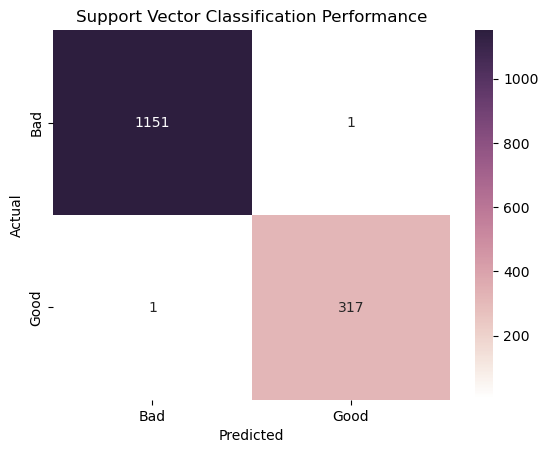

In [20]:
ax = plt.subplot( )
sns.heatmap(confusion_matrix(y_test, y_pred),
annot = True,
fmt = 'g',
ax=ax,
cmap = sns.cubehelix_palette(light=1, as_cmap=True))


ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Support Vector Classification Performance')
ax.xaxis.set_ticklabels(['Bad', 'Good'])
ax.yaxis.set_ticklabels(['Bad', 'Good']);
